# Assignment 1

Due Friday 5th August 23:59

# Assignment Outline
### Explore data
* Inspect the shape and types of data
* Visualization
* Value counts
### Clean data
* null
* nonsensical 
### Understand data
* Find relationships
    * Correlation
    * Mean house price against categorical levels
* Feature engineering
    * livingArea and bedrooms variable?
    * lotSize and landValue variable?



In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Import CSV

In [5]:
import csv

with open("data.csv", 'r') as data:
    header = csv.reader(data).__next__()

# remove unnamed row.
houses = pd.read_csv('data.csv', usecols=header[1:])

# Explore the Data

There are 1728 rows and 16 features. There are no missing values from dataset.

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


Price[1], livingArea[5], pctCollege[6], bedrooms[7], fireplaces[8], bathrooms[9] and rooms[10] are approximately normally distributed.
lotSize[2], age[3], landValue[4] are right skewed and could use normalizing.

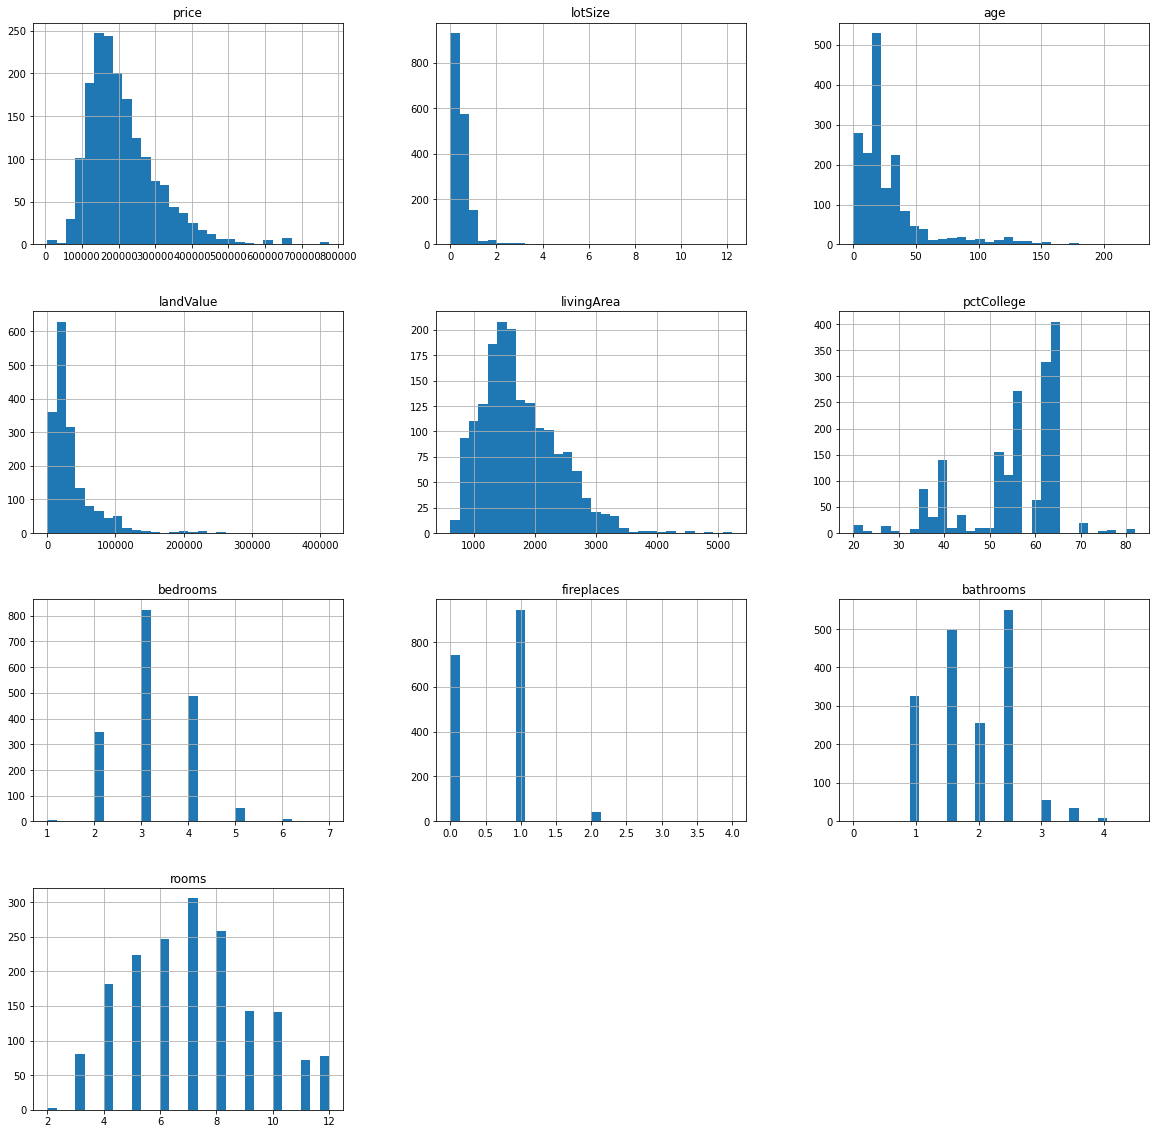

In [7]:
houses.hist(bins = 30, figsize = (20,20))
fig = plt.gcf() 
fig.savefig('hist.pdf', bbox_inches = 'tight')

Below emphasises the right tail skew in features 2, 3 and 4. They all have a disproportionately large spread and very large values.


In [6]:
houses.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


livingArea is correlated with multiple other features which may have a negative affect on our model, due to multicollinearity. Bedrooms and rooms may also affect our model negatively. I would like to see how the model performs both with and without these features.

<AxesSubplot:>

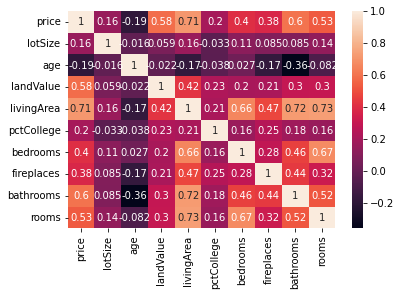

In [10]:
sns.heatmap(houses.corr(), annot=True)

It may be useful to see how the frequency of the categorical levels compare.

In [9]:
from sklearn.compose import make_column_selector as selector

my_selector = selector(dtype_include=object)
categorical = my_selector(houses)

# print the levels of the categorical variables
def levels(df, features):
    [print(feature, df[feature].unique()) for feature in features]

levels(houses, categorical)


heating ['electric' 'hot water/steam' 'hot air']
fuel ['electric' 'gas' 'oil']
sewer ['septic' 'public/commercial' 'none']
waterfront ['No' 'Yes']
newConstruction ['No' 'Yes']
centralAir ['No' 'Yes']


Barcharts are created to see how these levels balance.

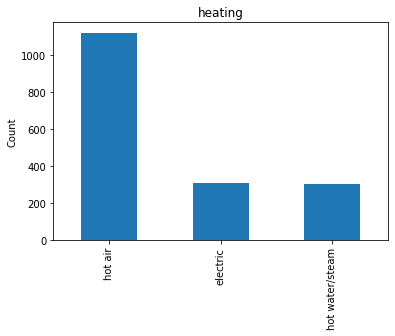

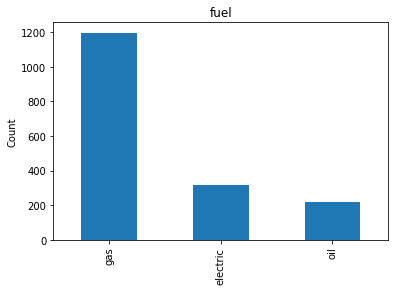

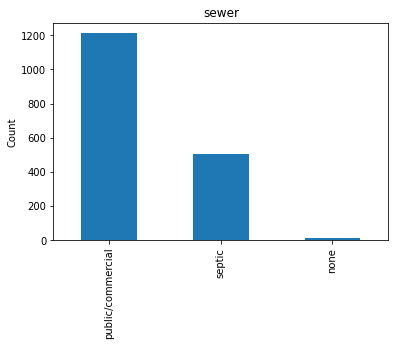

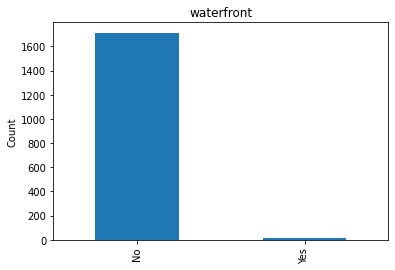

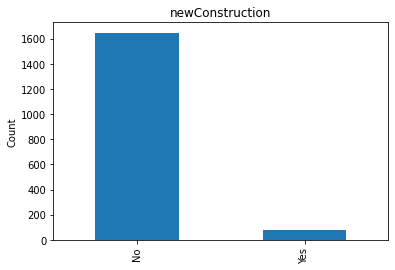

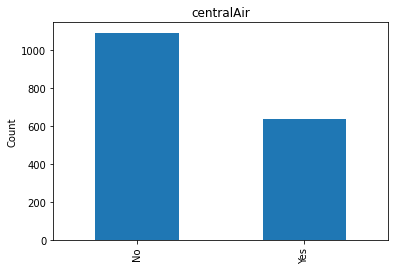

In [10]:
def plot_categorical(df, features):
    for feature in features:
        df[feature].value_counts().plot(kind='bar')
        plt.title(feature)
        plt.ylabel('Count')
        plt.show()
plot_categorical(houses, categorical)

Compare categorical levels with their mean price

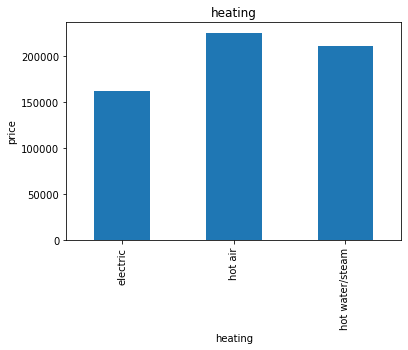

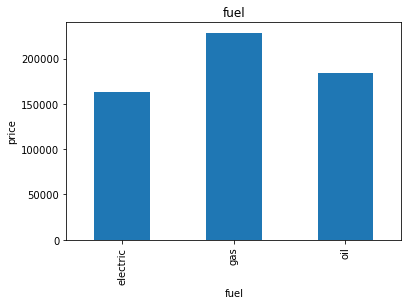

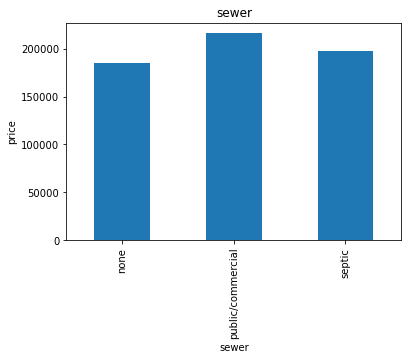

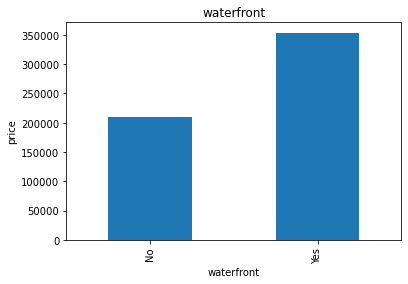

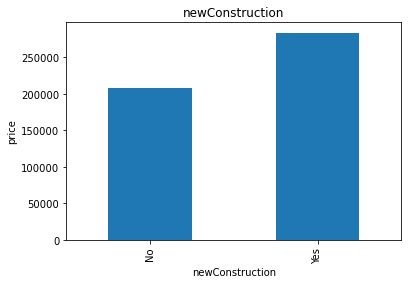

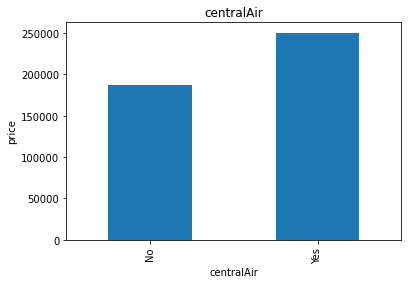

In [ ]:
def compare_categorical(df, features, target):
    for feature in features:
        df.groupby(feature).mean()[target].plot(kind='bar')
        plt.title(feature)
        plt.ylabel(target)
        plt.show()
compare_categorical(houses, categorical, 'price')


Now that we know some information about our data, we can split it.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(houses, 
                                       test_size = 0.2,
                                      random_state = 0)

In [ ]:
train_set.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1003,249900,0.86,36,35800,2680,63,5,1,3.5,12,hot water/steam,gas,public/commercial,No,No,Yes
1517,385000,0.50,7,17500,2259,64,4,1,2.5,9,hot air,gas,public/commercial,No,No,Yes
1482,176000,0.42,21,12250,1292,64,3,0,1.5,6,electric,electric,public/commercial,No,No,No
1469,141160,0.17,20,15800,912,40,2,0,1.5,6,electric,electric,public/commercial,No,No,No
1254,168000,0.25,35,50000,1800,62,2,0,1.0,5,hot air,gas,public/commercial,No,No,No


In [ ]:
test_set.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
458,20000,0.52,59,8000,936,20,2,0,1.0,4,hot air,oil,septic,No,No,No
461,133300,0.34,118,6200,1060,41,4,0,1.0,8,hot water/steam,gas,public/commercial,No,No,No
587,187000,1.00,25,98500,1600,57,3,1,1.5,7,hot air,gas,septic,No,No,Yes
527,182500,0.46,20,13800,1475,57,3,1,2.0,8,hot air,gas,septic,No,No,No
1033,311000,0.46,17,60500,2762,63,4,1,2.5,8,hot water/steam,gas,public/commercial,No,No,Yes


# Discover and visualize data

In [ ]:
houses = train_set.copy()

In [ ]:
corr_matrix = houses.corr()
corr_matrix["price"].sort_values(ascending = False)

price         1.000000
livingArea    0.721311
bathrooms     0.588990
landValue     0.571185
rooms         0.532167
fireplaces    0.430829
bedrooms      0.407634
pctCollege    0.171597
lotSize       0.125792
age          -0.172809
Name: price, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

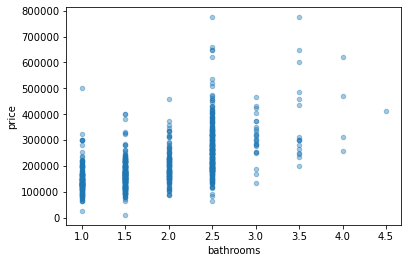

In [ ]:
houses.plot(kind = "scatter", x = "bathrooms", y = "price",
           alpha = 0.4)

<AxesSubplot:xlabel='landValue', ylabel='livingArea'>

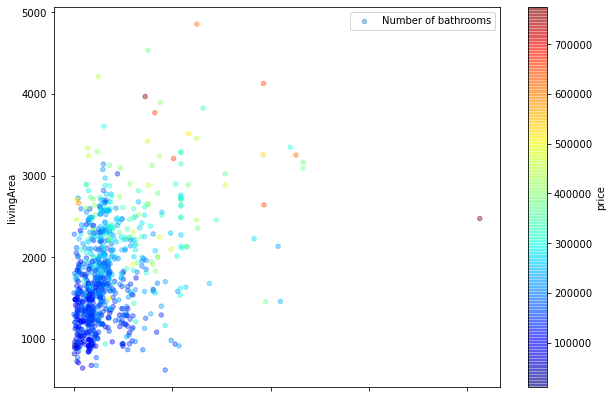

In [ ]:
houses.plot(kind = "scatter", x = "landValue", y = "livingArea",
           alpha = 0.4,
           label = "Number of bathrooms",
           figsize = (10,7),
           c = "price", 
           cmap = plt.get_cmap("jet"))

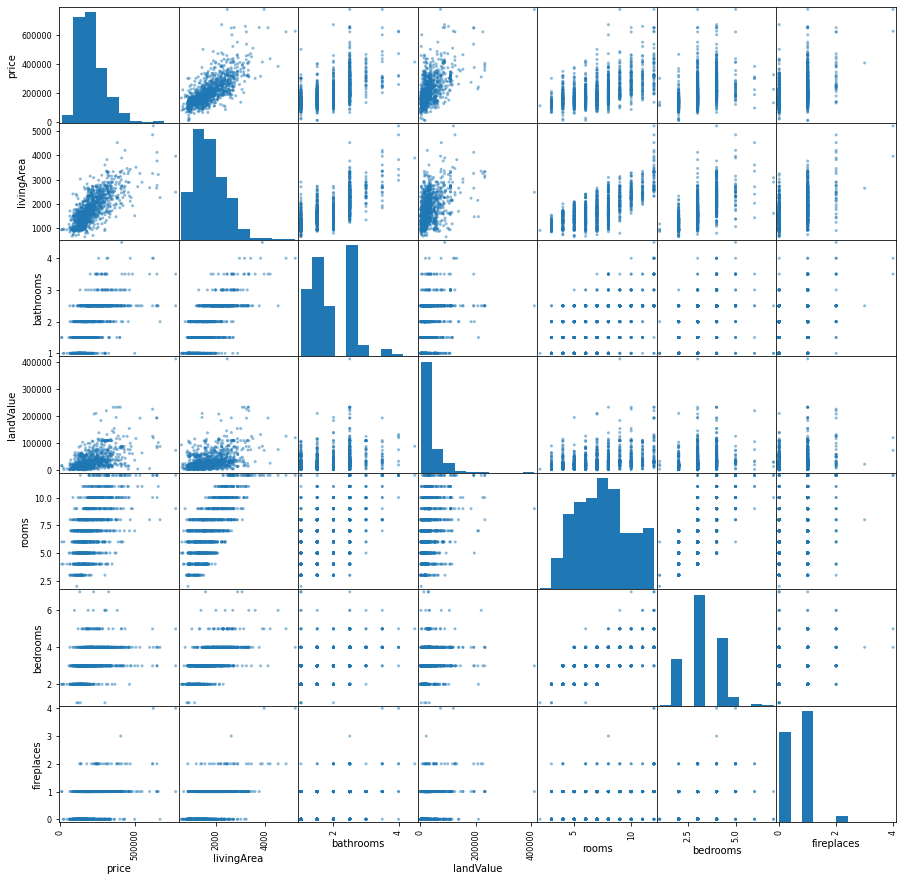

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "livingArea", "bathrooms", 
              "landValue", "rooms", "bedrooms", 
              "fireplaces"]
scatter_matrix(houses[attributes], figsize = (15,15))
plt.show()

## Prepare the data for machine learning algorithms

Separate the predictors and the labels since we don't
necessarily want to apply the same transformations
to the predictors and the target values.

In [ ]:
X_train = train_set.drop("price", axis = 1) # drop labels for the training set
y_train = train_set["price"].copy()  # save the labels

In [ ]:
X_train.head(5)

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1442,0.16,18,15100,1514,40,3,1,1.5,5,electric,electric,public/commercial,No,No,No
237,0.16,19,15700,988,52,2,0,2.0,4,hot air,gas,public/commercial,No,No,No
234,0.16,18,15100,1184,52,3,0,2.0,5,electric,electric,public/commercial,No,No,No
93,0.46,26,18700,1350,51,3,0,1.5,5,hot air,gas,septic,No,No,No
1398,0.41,84,18200,1182,64,3,1,1.5,8,hot air,oil,public/commercial,No,No,No


In [ ]:
y_train.head(5)

1442    170000
237      65000
234     120000
93      126900
1398    148000
Name: price, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
data_transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # replace missing values with median
    ('std_scaler', StandardScaler()) #standardizes data
])
data_transform_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [ ]:
# only numerical allowed?
X_train_prepared = data_transform_pipeline.fit_transform(X_train)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'electric'

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

In [ ]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = data_transform_pipeline.transform(some_data)

print("predictions:", lin_reg.predict(some_data_prepared))
